# CW2


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [4]:
"""
img: The input grayscale image.
GL: Number of gray levels.
d: The distance between pixel pairs.
t: The angle (in degrees) specifying the direction of pixel pairs.
"""
def am_glcm_faster( img , GL , d , t):
    ccmm = np.zeros([GL, GL])
    if t==0:
        im_target = img[:,d:]
        im_value = img[:,:-d]
        '''
        1 2 3 4 5 6 7 8 9 10  original
        1 2 3 4 5 6 7 8 9     target
          2 3 4 5 6 7 8 9 10  value
        '''
    elif t==45:
        im_target = img[d:,d:]
        im_value = img[:-d, :-d]
    elif t==90:
        im_target = img[d:,:]
        im_value = img[:-d, :]
    elif t==135:
        im_target = img[:-d, :-d]
        im_value = img[d:,d:]
    else:
        raise NotImplementedError('t options: 0, 45, 90, 135 only')
    assert im_target.shape==im_value.shape
    ref_gls = np.unique(im_value)
    # print(ref_gls)
    for ref in ref_gls:
        #ref: 80
        target_values = im_target[im_value == ref]
        #target_values: [ 98,  89,  99, 100]
        target_gls = np.unique(target_values)
        #[ 89,  98,  99, 100]
        for target in target_gls:
              
               ccmm[ref, target] = (target_values==target).sum()
    return ccmm


In [5]:
glcm_energy = lambda gl : np.sum(np.multiply(gl,gl))


In [6]:
def ready_2_show(a, level=255):
    a = ( a - np.min(a) ) / (np.max(a) - np.min(a)) 
    a = a * level
    return np.uint8(a)


# function to compute the image power. input could be graylevel or color. 
#
def am_power(a):
    dim1 = a.shape
    
    if len(dim1)==2:
        sz = dim1[0] * dim1[1] 
    elif len(dim1)==3:
        sz = dim1[0] * dim1[1] * dim1[2]        
    pa = np.sum( a ** 2.0) / sz    
    
    return pa

def am_entropy(nimg , N=256):
    M = nimg.shape
    ssz = M[0] * M[1]
    hist,bins = np.histogram(nimg.flatten(),N,[0,N])
    hist = hist / ssz
    ent = -np.sum( hist * np.log2(hist+0.000001))
    return ent


### cw2-q1

In [7]:
a = cv2.imread('/Users/cx/Documents/GitHub/CS4243_2023_images_small/collage1.bmp',0)
b = cv2.imread('/Users/cx/Documents/GitHub/CS4243_2023_images_small/20230324_105524gl.jpg',0)


a = a[:512 , :512]
b = b[:512 , :512]

print(a.shape , b.shape)

(512, 512) (512, 512)


In [8]:
aglcm30 = am_glcm_faster( a , 256, 3, 0)
bglcm30 = am_glcm_faster( b , 256, 3, 0) 
aglcm390 = am_glcm_faster( a , 256, 3, 90)
bglcm390 = am_glcm_faster( b , 256, 3, 90) 

print( 'aglcm30 energy= %e \tbglcm30 energy=%e' %(glcm_energy(aglcm30), glcm_energy(bglcm30)) )
print( 'aglcm390 energy= %e \tbglcm390 energy=%e' %(glcm_energy(aglcm390), glcm_energy(bglcm390)) )

aglcm30 energy= 1.232332e+08 	bglcm30 energy=1.325814e+08
aglcm390 energy= 2.364431e+07 	bglcm390 energy=1.509953e+08


(<AxesSubplot: >,
 (-0.5, 255.5, 255.5, -0.5))

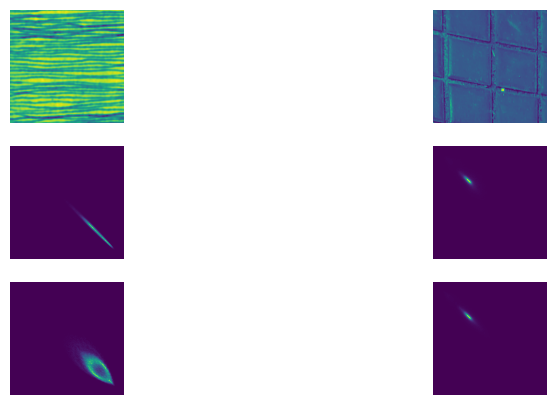

In [9]:
# showing the result

plt.figure(figsize=(10, 5))
plt.subplot(321), plt.imshow(a), plt.axis('off') 
plt.subplot(322), plt.imshow(b) , plt.axis('off')
plt.subplot(323), plt.imshow(aglcm30), plt.axis('off') 
plt.subplot(324), plt.imshow(bglcm30) , plt.axis('off')
plt.subplot(325), plt.imshow(aglcm390), plt.axis('off') 
plt.subplot(326), plt.imshow(bglcm390) , plt.axis('off')
                                            

## CW2 Q2

In [ ]:
c = cv2.imread('/Users/cx/Documents/GitHub/CS4243_2023_images_small/IMG_0054_1024bw.bmp',0)
d = cv2.imread('/Users/cx/Documents/GitHub/CS4243_2023_images_small/6ae-007_1024_bw.bmp',0)

print(c.shape , d.shape)

In [9]:
# showing the result
cv2.imshow("c",c)
cv2.imshow("d",d)


In [10]:
# create figure
fig = plt.figure(figsize=(10,10))

# setting values to rows and column variables
rows = 3
columns = 3


<Figure size 1000x1000 with 0 Axes>

In [11]:
L3 = np.array([1,2,1]) / 4
E3 = np.array([-1,0,1])
S3 = np.array([-1,2,-1])
llist = [L3 , E3 , S3]

laws = []
for xs in llist:
    for ys in llist:
        xs= np.reshape(xs,(3,1))
        ys = np.reshape(ys,(1,3))
        L3L3 = np.matmul(xs,ys)  
        laws.append(L3L3)

In [12]:
laws

[array([[0.0625, 0.125 , 0.0625],
        [0.125 , 0.25  , 0.125 ],
        [0.0625, 0.125 , 0.0625]]),
 array([[-0.25,  0.  ,  0.25],
        [-0.5 ,  0.  ,  0.5 ],
        [-0.25,  0.  ,  0.25]]),
 array([[-0.25,  0.5 , -0.25],
        [-0.5 ,  1.  , -0.5 ],
        [-0.25,  0.5 , -0.25]]),
 array([[-0.25, -0.5 , -0.25],
        [ 0.  ,  0.  ,  0.  ],
        [ 0.25,  0.5 ,  0.25]]),
 array([[ 1,  0, -1],
        [ 0,  0,  0],
        [-1,  0,  1]]),
 array([[ 1, -2,  1],
        [ 0,  0,  0],
        [-1,  2, -1]]),
 array([[-0.25, -0.5 , -0.25],
        [ 0.5 ,  1.  ,  0.5 ],
        [-0.25, -0.5 , -0.25]]),
 array([[ 1,  0, -1],
        [-2,  0,  2],
        [ 1,  0, -1]]),
 array([[ 1, -2,  1],
        [-2,  4, -2],
        [ 1, -2,  1]])]

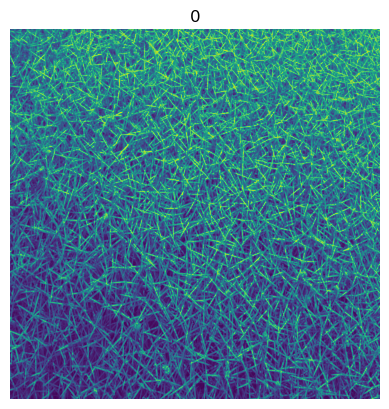

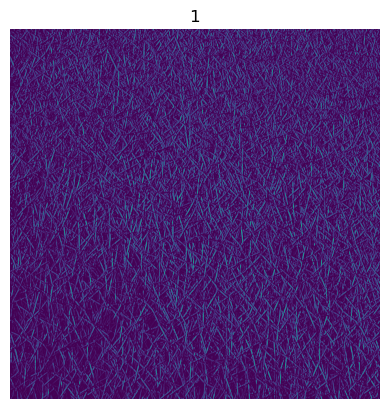

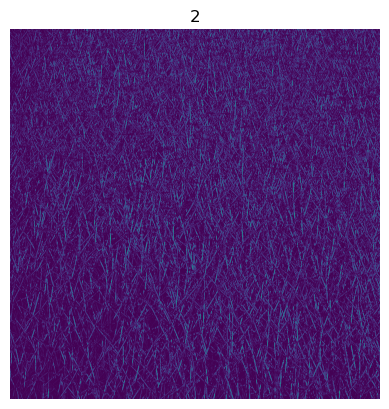

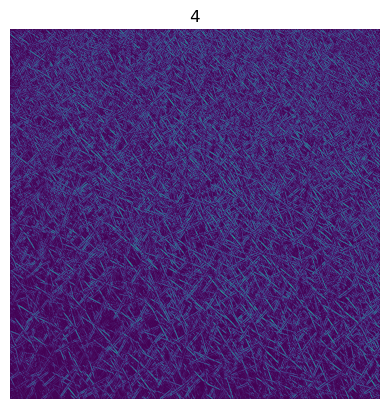

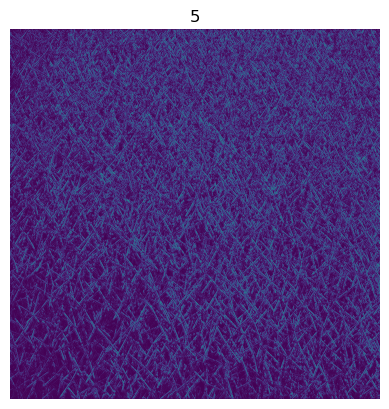

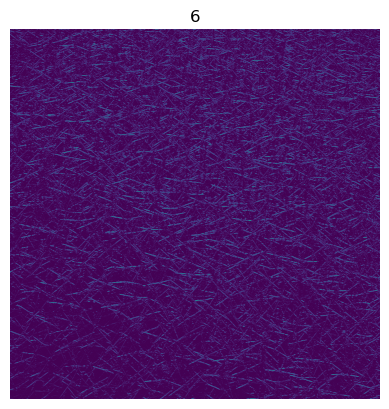

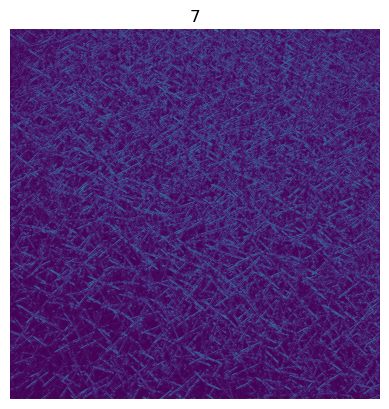

original image power c=  12783.794319152832
power of c 0 th filter response= 11494.777777671814
power of c 1 th filter response= 1757.9039726257324
power of c 2 th filter response= 1735.262674331665
power of c 3 th filter response= 1314.157166481018
power of c 4 th filter response= 3160.2816953659058
power of c 5 th filter response= 3860.060046195984
power of c 6 th filter response= 884.3464765548706
power of c 7 th filter response= 2622.840732574463
power of c 8 th filter response= 4172.190396308899


In [13]:
ppp=[]
fff= []
for i in range(9):
    f1 = cv2.filter2D(src=c, ddepth=-1, kernel= laws[i])
    fig.add_subplot(rows, columns, i+1) 
    # showing image
    plt.imshow(f1)
    plt.axis('off')
    plt.title(i)
    plt.show()
    ppp.append(am_power(f1))
    fff.append(f1)

print('original image power c= ' , am_power(c) )
for i in range(9):
    print('power of c', i ,'th filter response=', ppp[i] )

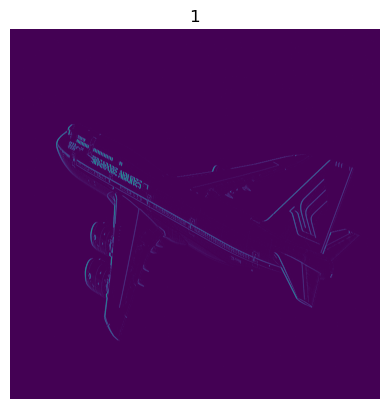

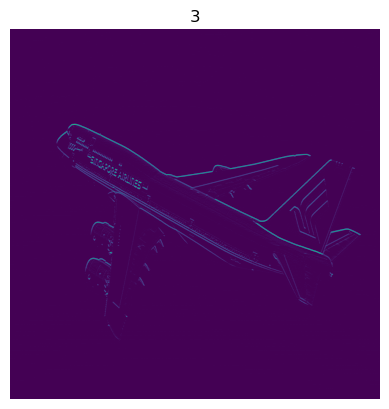

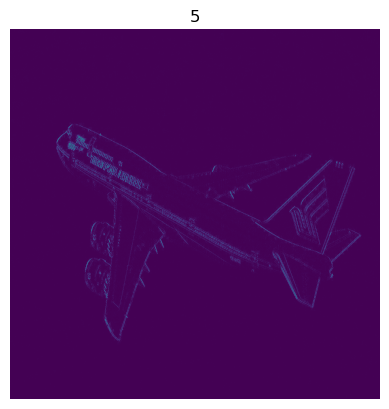

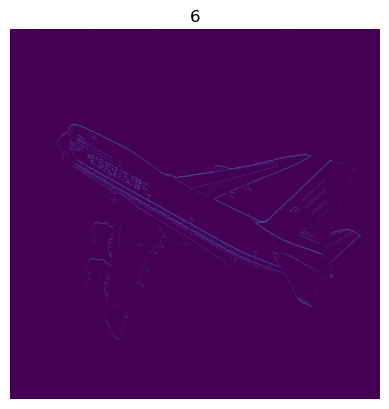

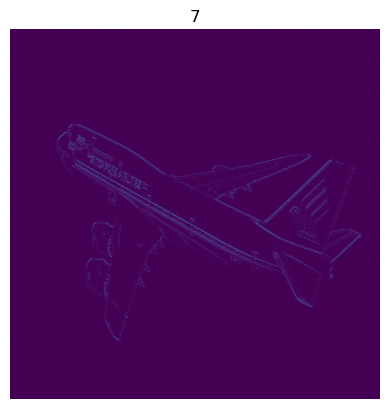

original image power d=  5660.925362586975
power of d 0 th filter response= 5602.862588882446
power of d 1 th filter response= 96.26849269866943
power of d 2 th filter response= 64.30005741119385
power of d 3 th filter response= 77.33382987976074
power of d 4 th filter response= 110.96645927429199
power of d 5 th filter response= 96.80512428283691
power of d 6 th filter response= 24.02619171142578
power of d 7 th filter response= 77.65265083312988
power of d 8 th filter response= 85.41726398468018


In [14]:
ppp=[]
fff= []
for i in range(9):
    f1 = cv2.filter2D(src=d, ddepth=-1, kernel= laws[i])
    fig.add_subplot(rows, columns, i+1) 
    # showing image
    plt.imshow(f1)
    plt.axis('off')
    plt.title(i)
    plt.show()
    ppp.append(am_power(f1))
    fff.append(f1)

print('original image power d= ' , am_power(d) )
for i in range(9):
    print('power of d', i ,'th filter response=', ppp[i] )

## cw2 q3

In [15]:
x = cv2.imread('..\\34.jpg',0)
y = cv2.imread('..\\68.jpg',0)

print(x.shape , y.shape)

(2281, 2980) (2592, 3888)


In [16]:
# showing the result
cv2.imshow("x",x)
cv2.imshow("y",y)


In [17]:
lp = np.ones((3,3)) * 0.111
hp = -np.ones((3,3))
hp[1,1]=8


In [18]:
print(lp)
print(hp)
print('power of original x= %e' %(am_power(x)) )
print('power of original y= %e' %(am_power(y)) )


[[0.111 0.111 0.111]
 [0.111 0.111 0.111]
 [0.111 0.111 0.111]]
[[-1. -1. -1.]
 [-1.  8. -1.]
 [-1. -1. -1.]]
power of original x= 2.011282e+04
power of original y= 1.489006e+04


In [19]:
flpx = cv2.filter2D(src=x, ddepth=-1, kernel= lp)
fhpx = cv2.filter2D(src=x, ddepth=-1, kernel= hp)

flpy = cv2.filter2D(src=y, ddepth=-1, kernel= lp)
fhpy = cv2.filter2D(src=y, ddepth=-1, kernel= hp)

In [20]:
print('power of flpx= %e \t Percentage: %5.2f' %(am_power(flpx) , am_power(flpx)/am_power(x)*100 ) )  
print('power of fhpx= %e \t Percentage: %5.2f' %(am_power(fhpx) , am_power(fhpx)/am_power(x)*100 ) )
print('power of flpy= %e \t Percentage: %5.2f' %(am_power(flpy) , am_power(flpy)/am_power(y)*100 ) )
print('power of fhpy= %e \t Percentage: %5.2f' %(am_power(fhpy) , am_power(fhpy)/am_power(y)*100 ) )


power of flpx= 2.006437e+04 	 Percentage: 99.76
power of fhpx= 2.262246e+02 	 Percentage:  1.12
power of flpy= 1.482550e+04 	 Percentage: 99.57
power of fhpy= 3.531668e+02 	 Percentage:  2.37


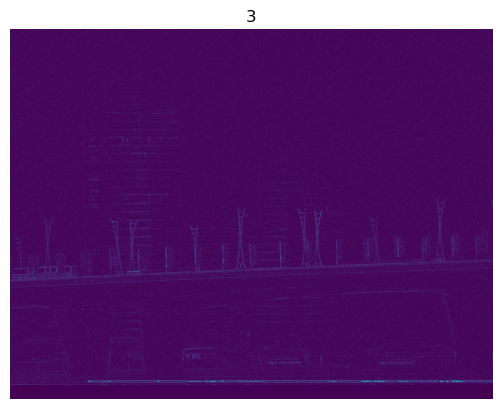

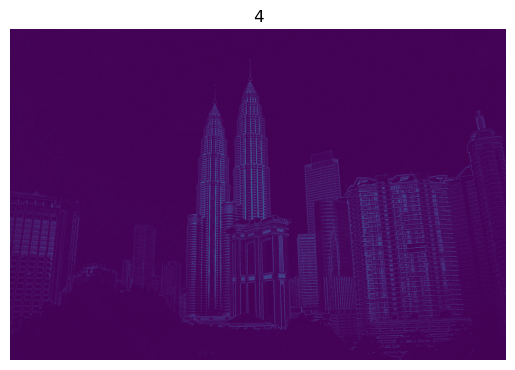

In [21]:
fig.add_subplot(2,2,1) 
plt.imshow(flpx)
plt.axis('off')
plt.title(1)
plt.show()
fig.add_subplot(2,2,2) 
plt.imshow(flpy)
plt.axis('off')
plt.title(2)
plt.show()
fig.add_subplot(2,2,3) 
plt.imshow(fhpx)
plt.axis('off')
plt.title(3)
plt.show()
fig.add_subplot(2,2,4) 
plt.imshow(fhpy)
plt.axis('off')
plt.title(4)
plt.show()


In [22]:
xd = cv2.resize(x, None,fx=0.25, fy=0.25 , interpolation = cv2.INTER_LINEAR) 
yd = cv2.resize(y, None,fx=0.25, fy=0.25 , interpolation = cv2.INTER_LINEAR) 

print( 'size & power:',xd.shape, am_power(xd) , yd.shape , am_power(yd) )

size & power: (570, 745) 20139.25621806193 (648, 972) 14899.361336559468


In [23]:
flpdx = cv2.filter2D(src=xd, ddepth=-1, kernel= lp)
fhpdx = cv2.filter2D(src=xd, ddepth=-1, kernel= hp)

flpdy = cv2.filter2D(src=yd, ddepth=-1, kernel= lp)
fhpdy = cv2.filter2D(src=yd, ddepth=-1, kernel= hp)


In [24]:
print('power of flpx= %e \t Percentage: %5.2f' %(am_power(flpdx) , am_power(flpdx)/am_power(xd)*100 ) )
print('power of fhpx= %e \t Percentage: %5.2f' %(am_power(fhpdx) , am_power(fhpdx)/am_power(xd)*100 ) )
print('power of flpy= %e \t Percentage: %5.2f' %(am_power(flpdy) , am_power(flpdy)/am_power(yd)*100 ) )
print('power of fhpy= %e \t Percentage: %5.2f' %(am_power(fhpdy) , am_power(fhpdy)/am_power(yd)*100 ) )


power of flpx= 2.006692e+04 	 Percentage: 99.64
power of fhpx= 7.386142e+02 	 Percentage:  3.67
power of flpy= 1.470547e+04 	 Percentage: 98.70
power of fhpy= 2.754279e+03 	 Percentage: 18.49


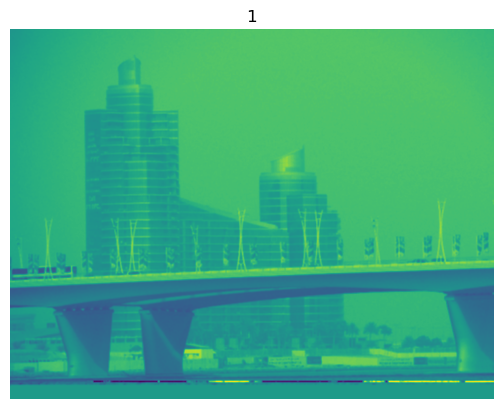

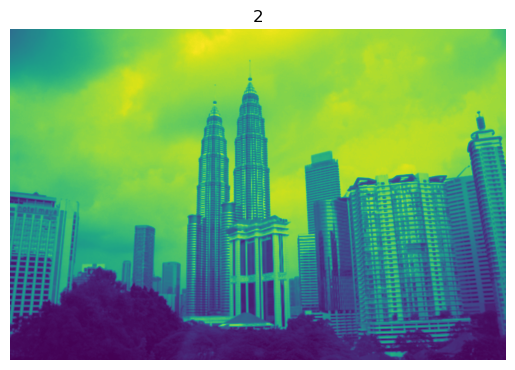

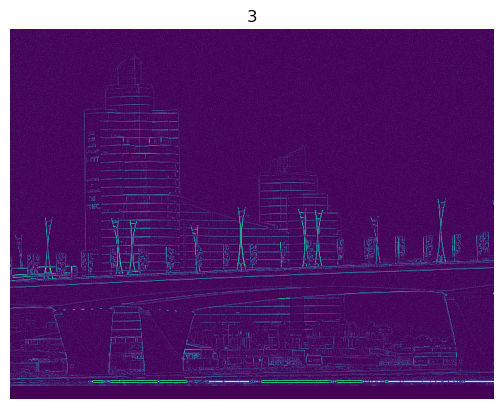

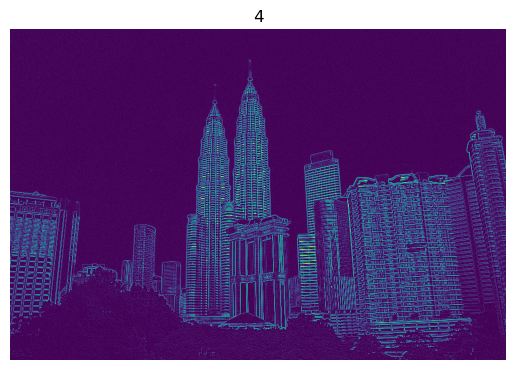

In [25]:
fig.add_subplot(2,2,1) 
plt.imshow(flpdx)
plt.axis('off')
plt.title(1)
plt.show()
fig.add_subplot(2,2,2) 
plt.imshow(flpdy)
plt.axis('off')
plt.title(2)
plt.show()
fig.add_subplot(2,2,3) 
plt.imshow(fhpdx)
plt.axis('off')
plt.title(3)
plt.show()
fig.add_subplot(2,2,4) 
plt.imshow(fhpdy)
plt.axis('off')
plt.title(4)
plt.show()


In [ ]:
## CW2 - Q5

In [26]:
cv2.waitKey(0) 
cv2.destroyAllWindows()